[[ 63915.27777778   6140.625     ]
 [109905.55555556   7325.69444444]
 [ 23539.13043478   5272.01086957]]


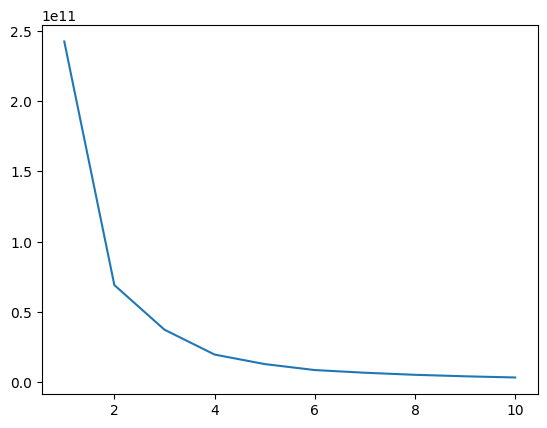

[0 0 0 1 1 1 1 0 1 3 3 0 3 1 0 2 0 1 0 0 1 1 0 3 2 3 1 0 1 3 1 3 3 0 3 3 3
 1 3 2 2 1 0 1 1 3 3 3 3 2 1 0 2 2 0 0 1 0 3 0 2 0 3 1 3 1 3 0 3 1 0 0 0 0
 1 1 2 0 3 1 1 1 3 3 2 0 0 3 1 1 0 1 2 3 1 3 1 0 1 1 3 2 0 1 1 0 0 3 3 2 2
 0 0 0 0 3 1 0 3 3 1 3 0 0 0 3 1 1 2 1 1 3 3 3 3 1 3 3 0 3 0 1 3 3 0 3 3 3
 3 1 3 3 0 1 3 2 1 3 2 1 3 3 1 3 1 3 3 0 1 1 0 1 1 3 0 1 1 3 2 3 3 0 3 2 0
 2 1 1 3 1 3 1 3 0 1 0 0 3 3 3]


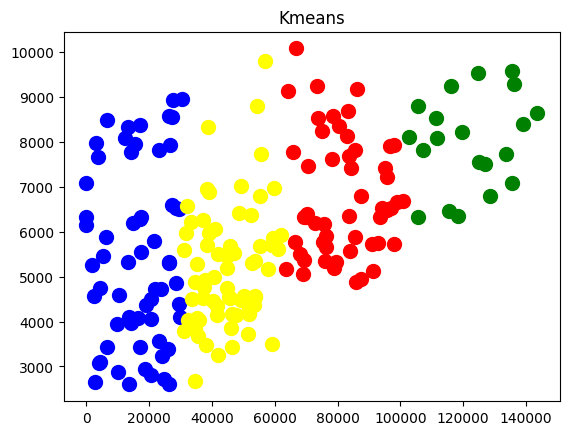

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


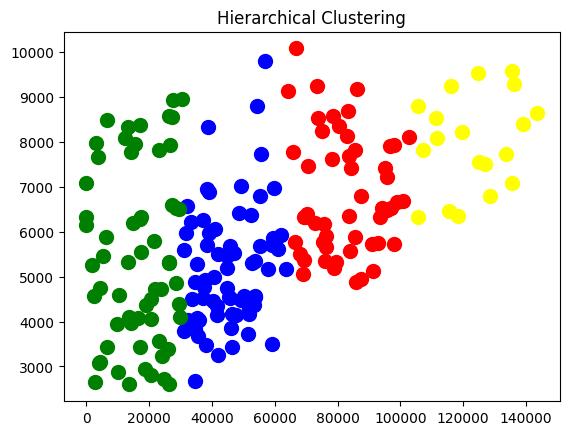

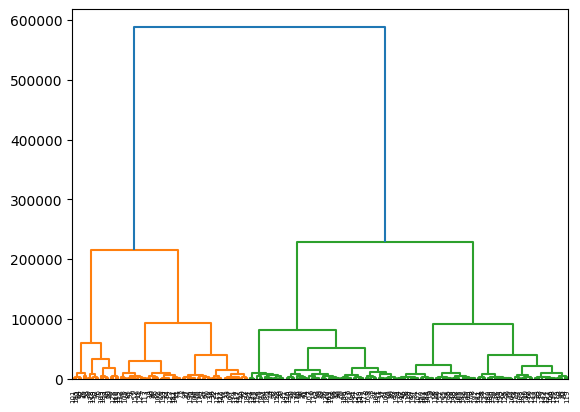

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('../datasources/customers.csv')
#print(data)

X=data.iloc[:,3:].values


from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

results=[]


for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    results.append(kmeans.inertia_)

plt.plot(range(1,11),results)
plt.show()
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=123)
Y_prediction=kmeans.fit_predict(X)
print(Y_prediction)

plt.scatter(X[Y_prediction==0,0], X[Y_prediction==0,1], s=100, c='red')
plt.scatter(X[Y_prediction==1,0], X[Y_prediction==1,1], s=100, c='blue')
plt.scatter(X[Y_prediction==2,0], X[Y_prediction==2,1], s=100, c='green')
plt.scatter(X[Y_prediction==3,0], X[Y_prediction==3,1], s=100, c='yellow')
plt.title('Kmeans')
plt.show()
#Hierarchical Clustering   
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Y_prediction=AC.fit_predict(X)
print(Y_prediction)

plt.scatter(X[Y_prediction==0,0], X[Y_prediction==0,1], s=100, c='red')
plt.scatter(X[Y_prediction==1,0], X[Y_prediction==1,1], s=100, c='blue')
plt.scatter(X[Y_prediction==2,0], X[Y_prediction==2,1], s=100, c='green')
plt.scatter(X[Y_prediction==3,0], X[Y_prediction==3,1], s=100, c='yellow')
plt.title('Hierarchical Clustering')
plt.show()

import scipy.cluster.hierarchy as sch
dengrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

